<a href="https://colab.research.google.com/github/satriaabraarr/PCVK_Ganjil_2024/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


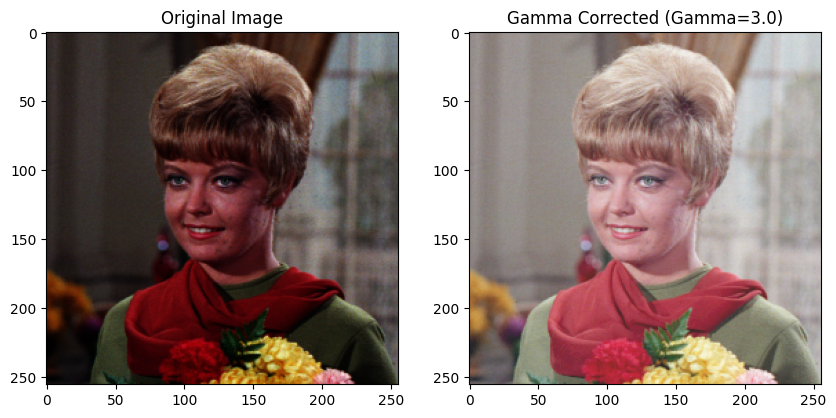

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Meminta input dari pengguna
print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

# Fungsi untuk melakukan Gamma Correction
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Cek apakah citra berhasil dibaca
if image is None:
    print('Error: Gambar tidak ditemukan!')
    exit()

# Terapkan Gamma Correction
corrected_image = gamma_correction(image, gamma)

# Ubah citra dari BGR ke RGB untuk keperluan plotting dengan Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
corrected_image_rgb = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB)

# Menampilkan citra asli dan citra setelah Gamma Correction secara berdampingan
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(corrected_image_rgb)
plt.title(f'Gamma Corrected (Gamma={gamma})')
plt.axis('on')

plt.show()

# 2. Buat Simulasi Image Depth

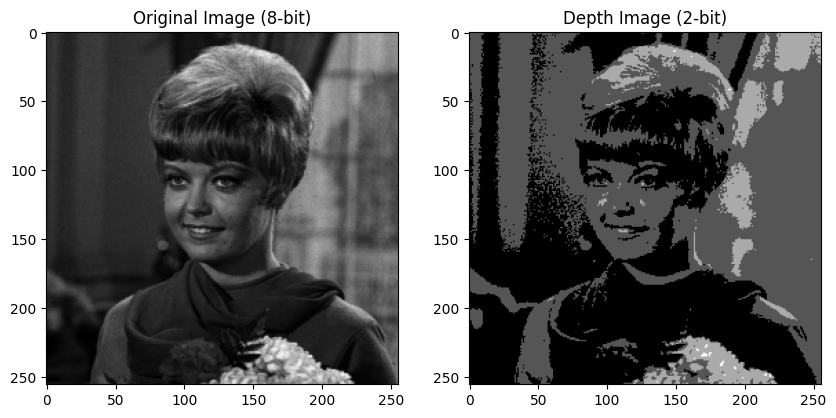

In [28]:
# Nilai kedalaman bit yang ingin digunakan
bit_depth = 2

# Menghitung level warna berdasarkan kedalaman bit
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra masukan dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff', cv.IMREAD_GRAYSCALE)

# Membuat citra baru dengan kedalaman bit yang disimulasikan
depth_image = np.zeros(original.shape, original.dtype)

# Simulasi kuantisasi kedalaman bit
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Melakukan quantisasi pada tiap pixel
        depth_image[i, j] = round(original[i, j] / level) * level

# Menampilkan citra asli dan citra hasil kedalaman bit yang baru
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image (8-bit)')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Depth Image ({bit_depth}-bit)')
plt.axis('on')

plt.show()

# 3. Buat modul Average Denoising

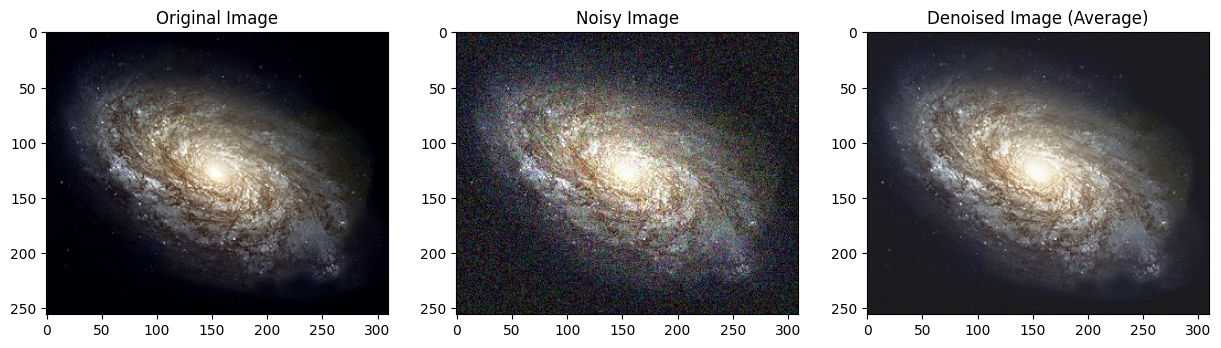

In [30]:
import glob

# Fungsi untuk melakukan Average Denoising
def average_denoising(image_list):
    # Inisialisasi array dengan ukuran dan tipe yang sama dengan gambar
    avg_image = np.zeros_like(image_list[0], dtype=np.float32)

    # Menambahkan setiap gambar ke citra rata-rata
    for img in image_list:
        avg_image += img.astype(np.float32)

    # Membagi dengan jumlah gambar untuk mendapatkan rata-rata
    avg_image /= len(image_list)

    # Konversi kembali ke tipe uint8 untuk citra yang dapat ditampilkan
    return avg_image.astype(np.uint8)

# Membaca semua citra dengan Gaussian Noise di folder /images/noises/
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/image/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Melakukan Average Denoising
denoised_image = average_denoising(cv_img)

# Membaca citra asli untuk perbandingan
original_image = cv.imread('/content/drive/MyDrive/PCVK/image/galaxy.jpg')

# Menampilkan citra asli, citra dengan noise (contoh salah satu), dan citra hasil denoising
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
plt.title('Denoised Image (Average)')
plt.axis('on')

plt.show()